In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load dataset
dataset = fetch_openml(name="Energy_efficiency", version=1, as_frame=True)
df = dataset.frame

print(df.head())

# Basic shape
print("Dataset Shape:", df.shape)

# Number of records and attributes
n_records = df.shape[0]
n_columns = df.shape[1]

print("\nNumber of Records:", n_records)
print("Number of Total Columns:", n_columns)

# Feature names
print("\nColumn Names:")
print(df.columns.tolist())

# -----------------------------
# Separate Features and Target
# -----------------------------
# Since only Y1 exists as target
y = df["Y1"].astype(float)     # Heating Load
X = df.drop(columns=["Y1"])    # Remaining columns are input features

print("\nNumber of Input Features:", X.shape[1])
print("Target Variable:", y.name)

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


     X1     X2     X3      X4   X5   X6   X7   X8     Y1
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84
Dataset Shape: (768, 9)

Number of Records: 768
Number of Total Columns: 9

Column Names:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']

Number of Input Features: 8
Target Variable: Y1

Data Types:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
dtype: object

Missing Values Per Column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

Statistical Summary:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.76416

e:\OneDrive\Desktop\Symbolic_Regression\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure numeric
df = df.apply(pd.to_numeric)

# Separate features and target
y = df["Y1"].astype(float)
X = df.drop(columns=["Y1"])

# Train-test split
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Scaling (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

# -----------------------------------------------------
# Create TWO versions:
# 1) For Traditional ML (scaled numpy)
# 2) For Symbolic Regression (numpy float)
# -----------------------------------------------------

# Traditional ML inputs
X_train_ml = X_train_scaled
X_test_ml = X_test_scaled

# Symbolic Regression inputs
X_train_sr = X_train_scaled.astype(float)
X_test_sr = X_test_scaled.astype(float)
y_train_sr = y_train.values.astype(float)
y_test_sr = y_test.values.astype(float)

print("Preprocessing Completed")
print("Train Shape:", X_train_ml.shape)
print("Test Shape:", X_test_ml.shape)


Preprocessing Completed
Train Shape: (614, 8)
Test Shape: (154, 8)


In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("\n==============================")
print("Energy Efficiency Dataset (Heating Load)")
print("==============================")

print("\nTarget Variance:", np.var(y_test))

# -----------------------------
# 1. Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_train_ml, y_train)
lr_pred = lr.predict(X_test_ml)

print("\nLinear Regression")
print("R² :", r2_score(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, lr_pred))

# -----------------------------
# 2. Ridge Regression
# -----------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_ml, y_train)
ridge_pred = ridge.predict(X_test_ml)

print("\nRidge Regression")
print("R² :", r2_score(y_test, ridge_pred))
print("RMSE:", mean_squared_error(y_test, ridge_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, ridge_pred))

# -----------------------------
# 3. Lasso Regression
# -----------------------------
lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_train_ml, y_train)
lasso_pred = lasso.predict(X_test_ml)

print("\nLasso Regression")
print("R² :", r2_score(y_test, lasso_pred))
print("RMSE:", mean_squared_error(y_test, lasso_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, lasso_pred))

# -----------------------------
# 4. Random Forest Regression
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train_ml, y_train)
rf_pred = rf.predict(X_test_ml)

print("\nRandom Forest Regression")
print("R² :", r2_score(y_test, rf_pred))
print("RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, rf_pred))

print("\nRandom Forest Feature Importances:")
print(rf.feature_importances_)



Energy Efficiency Dataset (Heating Load)

Target Variance: 104.23240928183505

Linear Regression
R² : 0.9118038162167849
RMSE: 3.0319796709720896
MAE : 2.17221658932295

Ridge Regression
R² : 0.9116028949393403
RMSE: 3.0354313093878527
MAE : 2.1907793299161833

Lasso Regression
R² : 0.9112858626977701
RMSE: 3.040869656590189
MAE : 2.204965713990391

Random Forest Regression
R² : 0.9934775756360946
RMSE: 0.8245289599573794
MAE : 0.4713533817734691

Random Forest Feature Importances:
[4.04117273e-01 2.06182488e-01 3.67233606e-02 1.34396685e-01
 1.29133947e-01 7.33291997e-05 7.76492863e-02 1.17236309e-02]


In [5]:
from pysr import PySRRegressor

print("\n===================================")
print("Training Symbolic Regression for Energy Efficiency (Heating Load)")
print("===================================")

# Use preprocessed SR variables
# (Already converted to numpy in preprocessing)
# X_train_sr, y_train_sr are ready to use

sr_model = PySRRegressor(
    niterations=1500,
    populations=20,
    population_size=50,
    maxsize=20,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["square", "sqrt"],
    parsimony=1e-4,
    verbosity=1,
    random_state=42
)

# Train model
sr_model.fit(X_train_sr, y_train_sr)

print("\nBest symbolic equation found:")
print(sr_model.get_best())


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython

Training Symbolic Regression for Energy Efficiency (Heating Load)


e:\OneDrive\Desktop\Symbolic_Regression\venv\lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
e:\OneDrive\Desktop\Symbolic_Regression\venv\lib\site-packages\pysr\sr.py:1873: UserWarning: Note: Setting `random_state` without also setting `deterministic=True` and `parallelism='serial'` will result in non-deterministic searches.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.150e+05
Progress: 336 / 30000 total iterations (1.120%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.009e+02  0.000e+00  y = 22.155
3           8.406e+01  9.142e-02  y = x₄ + 22.157
4           2.122e+01  1.377e+00  y = square(x₄ + 4.5929)
5           2.113e+01  4.028e-03  y = (x₄ / 0.11199) + 22.156
6           1.674e+01  2.332e-01  y = x₆ + square(x₄ + 4.5927)
7           1.665e+01  5.237e-03  y = ((x₄ / 0.11199) + x₆) + 22.156
8           1.309e+01  2.406e-01  y = square((x₄ + 4.5825) + (x₆ * 0.30315))
10          1.011e+01  1.293e-01  y = square((x₆ * 0.30534) + (x₄ + 4.5762)) + x₂
12          8.855e+00  6.619e-02  y = (square((4.5824 + (x₆ * 0.30314)) + x₄) + x₂) - x₀
14          7.682e+00  7.108e-02  y = square((x₄ - -4.5553) + ((x₂ +

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.009e+02  0.000e+00  y = 22.155
3           8.406e+01  9.142e-02  y = x₄ + 22.157
4           2.122e+01  1.377e+00  y = square(x₄ + 4.5929)
5           2.113e+01  4.028e-03  y = (x₄ + 2.4803) * 8.9325
6           1.674e+01  2.332e-01  y = x₆ + square(x₄ + 4.5927)
7           1.291e+01  2.601e-01  y = (x₆ + 8.8546) * (x₄ + 2.5048)
9           7.734e+00  2.560e-01  y = ((x₂ + x₆) + 8.2997) * (x₄ + 2.6326)
11          7.552e+00  1.190e-02  y = (x₄ + 2.648) * (x₆ + ((x₂ / 1.1818) + 8.2843))
12          6.072e+00  2.182e-01  y = (x₄ + 2.6351) * (((x₂ / square(x₃)) + 8.3639) + x₆)
13          3.832e+00  4.603e-01  y = (x₆ + ((x₂ / sqrt(square(x₂))) - -9.108)) * (x₄ + 2.53...
                                      17)
14          3.545e+00  7.778e-02  y = (x₄ + 2.3955) * ((x₆ + (x₂ / (square(x₂) - -0.0053695)...
                            

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sr_pred = sr_model.predict(X_test_sr)

print("\n===================================")
print("Symbolic Regression Performance")
print("===================================")

print("R² :", r2_score(y_test_sr, sr_pred))
print("RMSE:", mean_squared_error(y_test_sr, sr_pred, squared=False))
print("MAE :", mean_absolute_error(y_test_sr, sr_pred))




Symbolic Regression Performance
R² : 0.977447668044991
RMSE: 1.5331940172705851
MAE : 1.13169469480046


In [10]:
import pickle

with open("sr_model_energy_heating.pkl", "wb") as f:
    pickle.dump(sr_model, f)

print("Model saved successfully.")

import pickle

print("\n===================================")
print("Energy Efficiency Dataset - Discovered Equations")
print("===================================")

with open("sr_model_energy_heating.pkl", "rb") as f:
    model = pickle.load(f)

# Show top symbolic equations found
print(model.equations_.head())

print("\nBest Equation:")
print(model.get_best()["sympy_format"])

best_eq = model.get_best()

print("\nBest Discovered Equation:")
print("Complexity :", best_eq["complexity"])
print("Loss       :", best_eq["loss"])
print("Equation   :", best_eq["sympy_format"])


Model saved successfully.

Energy Efficiency Dataset - Discovered Equations
   complexity        loss                     equation     score  \
0           1  100.923904                    22.155106  0.000000   
1           3   84.058846               x4 + 22.156712  0.091425   
2           4   21.219330        square(x4 + 4.592854)  1.376605   
3           5   21.133980  (x4 + 2.4802969) * 8.932453  0.004030   
4           6   16.738346  x6 + square(x4 + 4.5926704)  0.233180   

                                        sympy_format  \
0                                   22.1551060000000   
1                                     x4 + 22.156712   
2      21.094307865316*(0.217729542458785*x4 + 1)**2   
3                     8.932453*x4 + 22.1551354852957   
4  x6 + 21.0926214030362*(0.217738246576545*x4 + ...   

                                       lambda_format  
0                  PySRFunction(X=>22.1551060000000)  
1                    PySRFunction(X=>x4 + 22.156712)  
2  PySRFuncti

In [11]:
import pickle

bundle = {
    "model": sr_model
}

with open("sr_bundle_energy_heating.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("Bundle saved successfully.")


Bundle saved successfully.



Plotting results for Energy Efficiency (Heating Load)


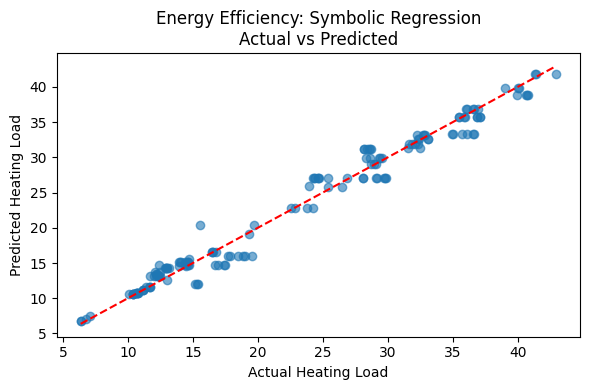

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

print("\nPlotting results for Energy Efficiency (Heating Load)")

# Load saved symbolic regression bundle
with open("sr_bundle_energy_heating.pkl", "rb") as f:
    obj = pickle.load(f)

sr_model = obj["model"]

# Predict using SR test data
y_pred = sr_model.predict(X_test_sr)

# ----------------------------------
# Plot Actual vs Predicted
# ----------------------------------
plt.figure(figsize=(6, 4))
plt.scatter(y_test_sr, y_pred, alpha=0.6)

# Perfect prediction reference line
min_val = min(y_test_sr.min(), y_pred.min())
max_val = max(y_test_sr.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Energy Efficiency: Symbolic Regression\nActual vs Predicted")
plt.tight_layout()
plt.show()


In [14]:

best_eq = sr_model.get_best()["sympy_format"]
print(best_eq)



x2 + 28.2412583767502*(0.188173289911719*x4 + 1 - 0.355119484864328/(x6 + 2.8750505))**2 + 0.8409344/(x1 + 0.54067427)
